In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

### Read 3 Datasets

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
ds1radiotemp = pd.read_csv("../../dataset_1_radioTemperatures_20210303.csv",sep=';',dtype={'id_audit':np.str})

In [4]:
ds1radiotemp.head()

,id_field_values,id_ftp,id_audit,value,unit,field
0,41310,108,147,23.5,C,TSensor_D4_
1,41311,108,147,23.8,C,TSensor_D5_
2,41312,108,147,26.3,C,TSensor_D6_
3,41313,108,147,23.5,C,TSensor_D8_
4,41314,108,147,23.0,C,TSensor_D9_


In [5]:
abc = ds1radiotemp.pivot_table(index=['id_audit'], columns=['field'],values=['value'])

In [6]:
abc = abc.droplevel(0, axis=1).reset_index()

In [7]:
abc.id_audit = abc.id_audit.astype(str)
abc.head()

field,id_audit,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_
0,1000033,NaN,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.5,28.3,NaN,NaN,28.0,27.8,32.8,NaN,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,32.3,28.6,28.6,23.0,23.0,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,NaN,NaN,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,NaN,NaN
1,1000034,NaN,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,37.0,NaN,NaN,27.3,27.3,29.8,NaN,29.8,29.5,25.5,26.5,26.5,24.5,34.0,35.5,36.5,33.0,24.0,25.5,25.0,23.5,33.5,35.5,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,29.9,27.5,27.5,30.1,30.1,32.0,32.0,25.5,25.5,24.0,24.0,34.0,34.0,33.0,33.0,NaN,NaN,25.5,26.5,26.5,24.0,34.0,35.0,36.5,33.0,NaN,NaN
2,1000035,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.3,30.7,NaN,NaN,32.5,32.8,32.8,NaN,25.8,25.8,36.5,43.5,45.5,42.0,23.5,24.5,25.0,25.0,42.5,45.5,46.5,43.0,23.5,23.5,24.0,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,32.1,34.6,34.6,25.9,25.9,27.6,27.6,37.0,37.0,42.0,42.0,24.0,24.0,25.0,25.0,NaN,NaN,37.0,43.5,45.5,42.0,24.0,24.0,25.0,25.0,NaN,NaN
3,1000044,NaN,57.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.9,62.3,NaN,NaN,62.8,62.3,67.5,NaN,57.0,56.8,74.0,78.0,77.0,71.5,64.5,63.5,58.0,54.0,79.0,79.0,77.0,73.0,65.0,66.0,60.5,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.6,67.6,65.1,65.1,58.0,58.0,56.3,56.3,74.0,74.0,72.0,72.0,64.5,64.5,54.0,54.0,NaN,NaN,74.0,78.0,77.0,72.0,64.5,63.0,58.0,54.0,NaN,NaN
4,1000047,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2,40.9,NaN,NaN,37.0,36.8,42.5,NaN,33.8,33.5,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,50.6,50.5,48.4,45.3,40.5,42.5,43.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,45.7,49.6,49.6,45.1,45.1,39.4,39.4,48.1,48.1,44.4,44.4,39.4,39.4,40.1,40.1,NaN,NaN,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,NaN,NaN


In [8]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67455 entries, 0 to 67454
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_audit      67455 non-null  object 
 1   TSensor_C1_   3 non-null      float64
 2   TSensor_D10_  67430 non-null  float64
 3   TSensor_D11_  7 non-null      float64
 4   TSensor_D12_  15 non-null     float64
 5   TSensor_D13_  15 non-null     float64
 6   TSensor_D14_  15 non-null     float64
 7   TSensor_D15_  15 non-null     float64
 8   TSensor_D16_  15 non-null     float64
 9   TSensor_D17_  15 non-null     float64
 10  TSensor_D18_  67452 non-null  float64
 11  TSensor_D19_  67445 non-null  float64
 12  TSensor_D2_   3 non-null      float64
 13  TSensor_D3_   7 non-null      float64
 14  TSensor_D4_   67430 non-null  float64
 15  TSensor_D5_   67430 non-null  float64
 16  TSensor_D6_   67430 non-null  float64
 17  TSensor_D7_   7 non-null      float64
 18  TSensor_D8_   67430 non-nu

In [9]:
abc.describe()

field,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_
count,3.000000,67430.000000,7.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,67452.000000,67445.000000,3.000000,7.000000,6.743000e+04,67430.000000,67430.000000,7.000000,67430.000000,67430.000000,67440.00000,67440.000000,67440.000000,67440.000000,67430.000000,67430.000000,67430.000000,67430.000000,67455.000000,67455.000000,67455.000000,67455.000000,67445.000000,67445.000000,67445.000000,67445.000000,18.000000,18.000000,18.000000,18.000000,15.000000,15.000000,15.000000,15.000000,67455.000000,67455.000000,67455.000000,67455.000000,6.744500e+04,6.744500e+04,67445.000000,67445.000000,67455.000000,67455.000000,67455.000000,67455.000000,67445.000000,67445.000000,67445.000000,67445.000000,3.000000,3.000000,67455.000000,67455.000000,67455.000000,67455.000000,67445.000000,67445.000000,67445.000000,67445.000000,3.000000,3.000000
mean,52.500000,49.672914,31.885714,29.706667,29.506667,21.746667,23.726667,21.026667,22.10000,59.919303,55.547001,47.000000,28.800000,2.000358e+04,48.126349,52.387396,28.742857,46.612784,46.639224,57.35348,59.995688,59.371490,55.752137,52.041544,53.525981,53.417111,52.133269,60.903213,61.157739,59.978028,56.950328,52.767424,54.643747,54.659572,54.303668,29.588889,29.611111,29.766667,29.488889,29.446667,29.446667,27.413333,27.413333,53.567584,53.567584,55.530647,55.530647,-5.991641e+03,-5.991641e+03,50.227410,50.227409,57.348019,57.347977,55.745954,55.745874,52.038815,52.038863,52.124530,52.124665,49.266667,49.333333,57.347851,59.988529,59.364101,55.746173,52.040111,53.522415,53.409559,52.125166,50.666667,52.333333
std,5.220153,21.189608,10.499751,17.478986,20.460361,14.988799,18.481476,16.242601,18.64231,23.520629,23.143070,5.335729,11.019679,1.831995e+06,21.585812,22.218958,11.250905,20.747058,20.741900,26.32856,27.536933,27.627613,26.766453,24.161577,24.352618,25.094634,24.314627,28.515797,28.807906,28.940105,27.907845,24.577658,25.088071,25.313870,25.433557,18.741018,18.837194,18.496518,18.116190,22.126418,22.126418,21.340065,21.340065,22.348464,22.348464,23.505843,23.505843,9.063029e+05,9.063029e+05,21.274203,21.274201,26.330874,26.330748,26.767637,26.767642,24.163098,24.163058,24.277705,24.277847,4.935923,3.400490,26.331041,27.538384,27.631560,26.767581,24.163502,24.352351,25.096675,24.277083,5.686241,5.773503
min,49.000000,-26.300000,18.800000,7.600000,5.700000,3.400000,2.000000,1.900000,1.50000,-275.400000,-21.800000,43.200000,14.000000,-2.500000e+01,-24.800000,-23.300000,13.800000,-28.300000,-28.000000,-27.80000,-27.300000,-256.000000,-256.000000,-402.800000,-310.800000,-276.300000,-273.300000,-81.800000,-27.800000,-256.000000,-256.000000,-296.300000,-273.300000,-273.300000,-273.300000,0.000000,0.000000,0.000000,0.000000,-1.300000,-1.300000,-1.300000,-1.300000,-24.400000,-24.400000,-24.100000,-24.100000,-1.358920e+08,-1.358920e+08,-256.000000,-256.000000,-27.800000,-28.300000,-256.000000,-256.000000,-402.800000,-402.800000,-273.300000,-273.300000,45.700000,45.900000,-28.300000,-27.300000,-256.000000,-256.000000,-402.800000,-310.800000,-276.800000,-273.300000,46.000000,49.000000
25%,49

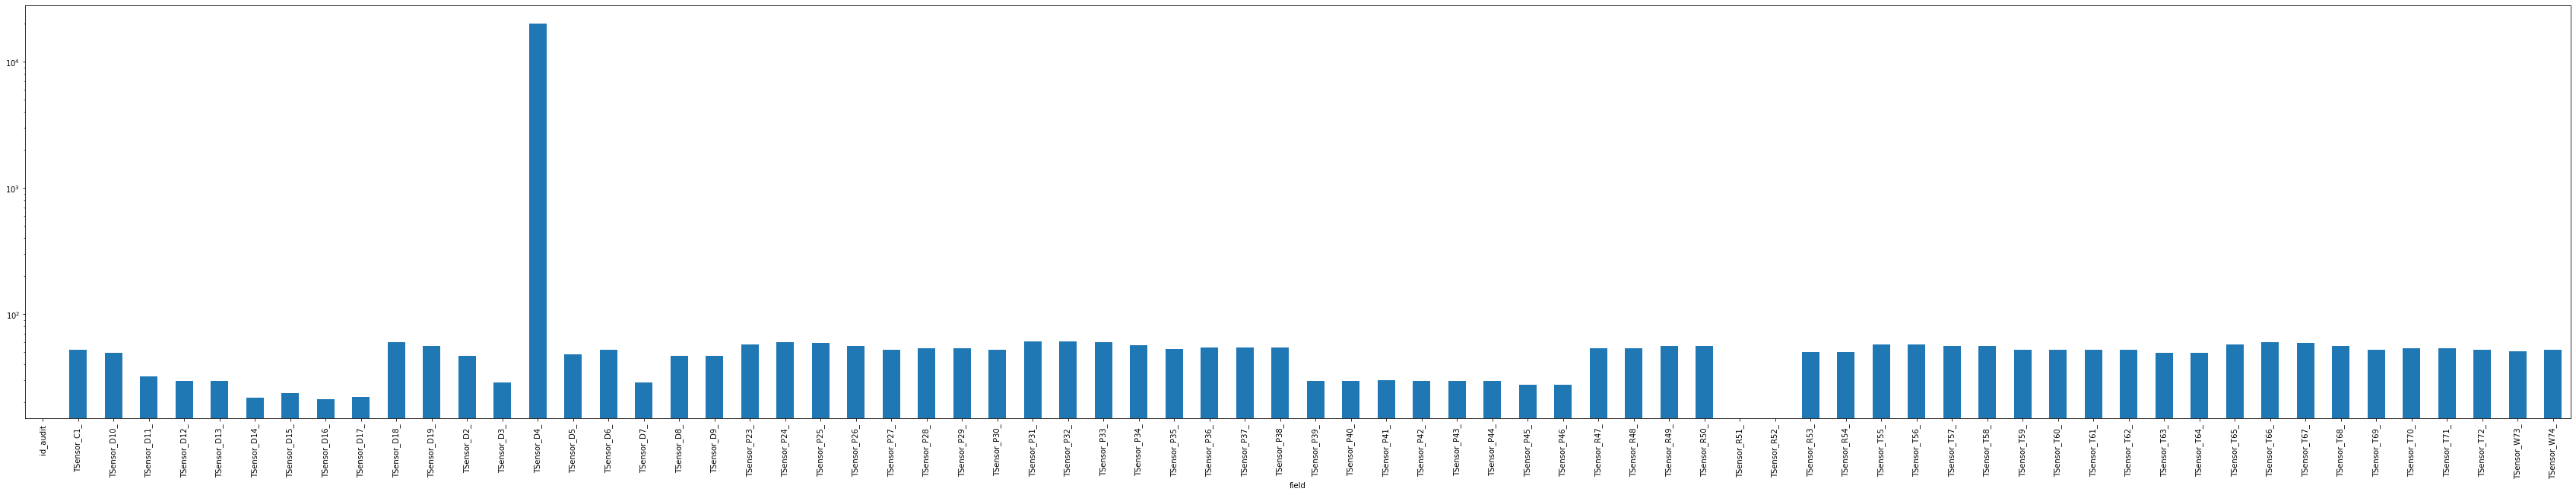

In [10]:
fig, ax = plt.subplots(figsize=(60,10)) 
ax = plt.axes(yscale='log')
ax.grid();
abc.mean().plot(kind="bar",ax=ax)

In [11]:
abc_nod4 = abc.drop(['TSensor_D4_','TSensor_R51_','TSensor_R52_'], axis=1)
abc_nod4.id_audit = abc_nod4.id_audit.astype(str)

In [12]:
abc_nod4.head()

field,id_audit,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_
0,1000033,NaN,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.5,28.3,NaN,NaN,27.8,32.8,NaN,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,32.3,28.6,28.6,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,NaN,NaN,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,NaN,NaN
1,1000034,NaN,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,37.0,NaN,NaN,27.3,29.8,NaN,29.8,29.5,25.5,26.5,26.5,24.5,34.0,35.5,36.5,33.0,24.0,25.5,25.0,23.5,33.5,35.5,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,29.9,27.5,27.5,32.0,32.0,25.5,25.5,24.0,24.0,34.0,34.0,33.0,33.0,NaN,NaN,25.5,26.5,26.5,24.0,34.0,35.0,36.5,33.0,NaN,NaN
2,1000035,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.3,30.7,NaN,NaN,32.8,32.8,NaN,25.8,25.8,36.5,43.5,45.5,42.0,23.5,24.5,25.0,25.0,42.5,45.5,46.5,43.0,23.5,23.5,24.0,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,32.1,34.6,34.6,27.6,27.6,37.0,37.0,42.0,42.0,24.0,24.0,25.0,25.0,NaN,NaN,37.0,43.5,45.5,42.0,24.0,24.0,25.0,25.0,NaN,NaN
3,1000044,NaN,57.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.9,62.3,NaN,NaN,62.3,67.5,NaN,57.0,56.8,74.0,78.0,77.0,71.5,64.5,63.5,58.0,54.0,79.0,79.0,77.0,73.0,65.0,66.0,60.5,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.6,67.6,65.1,65.1,56.3,56.3,74.0,74.0,72.0,72.0,64.5,64.5,54.0,54.0,NaN,NaN,74.0,78.0,77.0,72.0,64.5,63.0,58.0,54.0,NaN,NaN
4,1000047,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2,40.9,NaN,NaN,36.8,42.5,NaN,33.8,33.5,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,50.6,50.5,48.4,45.3,40.5,42.5,43.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,45.7,49.6,49.6,39.4,39.4,48.1,48.1,44.4,44.4,39.4,39.4,40.1,40.1,NaN,NaN,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,NaN,NaN


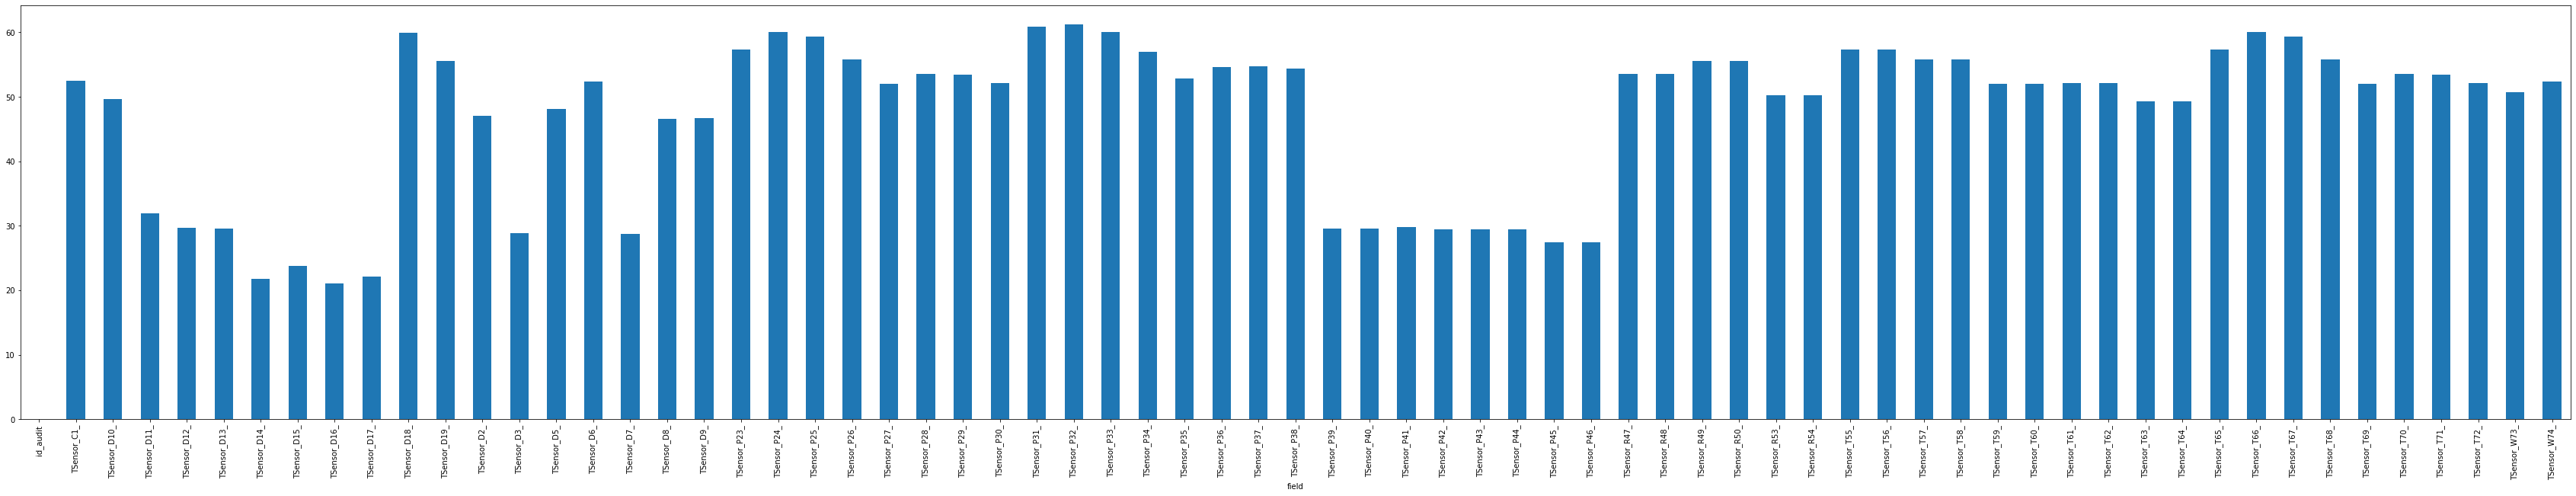

In [13]:
fig, ax = plt.subplots(figsize=(60,10)) 
ax = plt.axes(yscale='linear')
ax.grid();
abc_nod4.mean().plot(kind="bar",ax=ax)

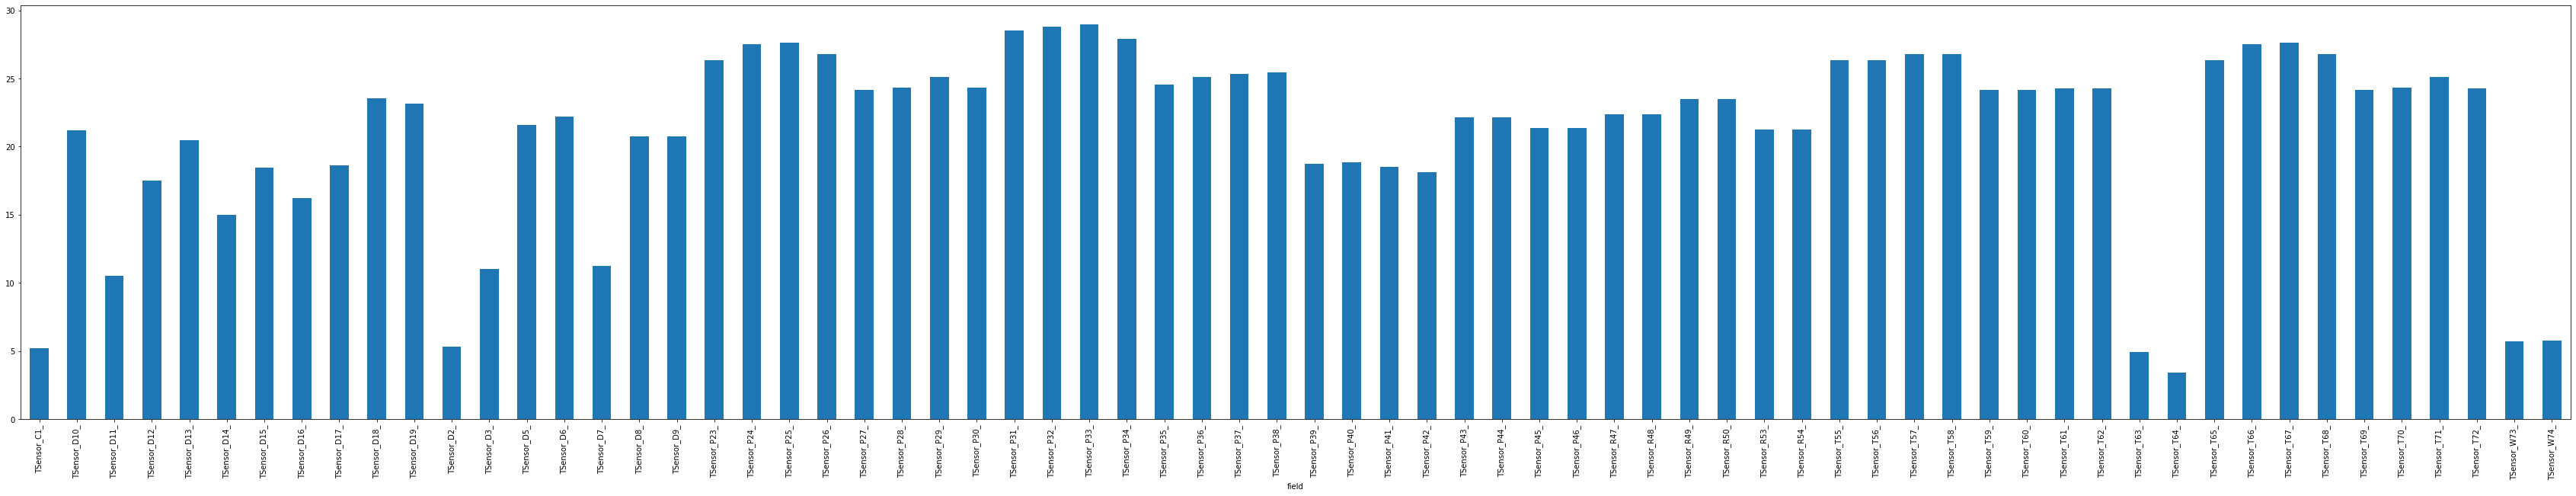

In [14]:
fig, ax = plt.subplots(figsize=(60,10)) 
ax = plt.axes(yscale='linear')
ax.grid();
abc_nod4.std().plot(kind="bar",ax=ax)

In [15]:
meds = abc_nod4.iloc[:,1:].median()
meds.sort_values(ascending=False, inplace=True)
sortedSensor = meds.index

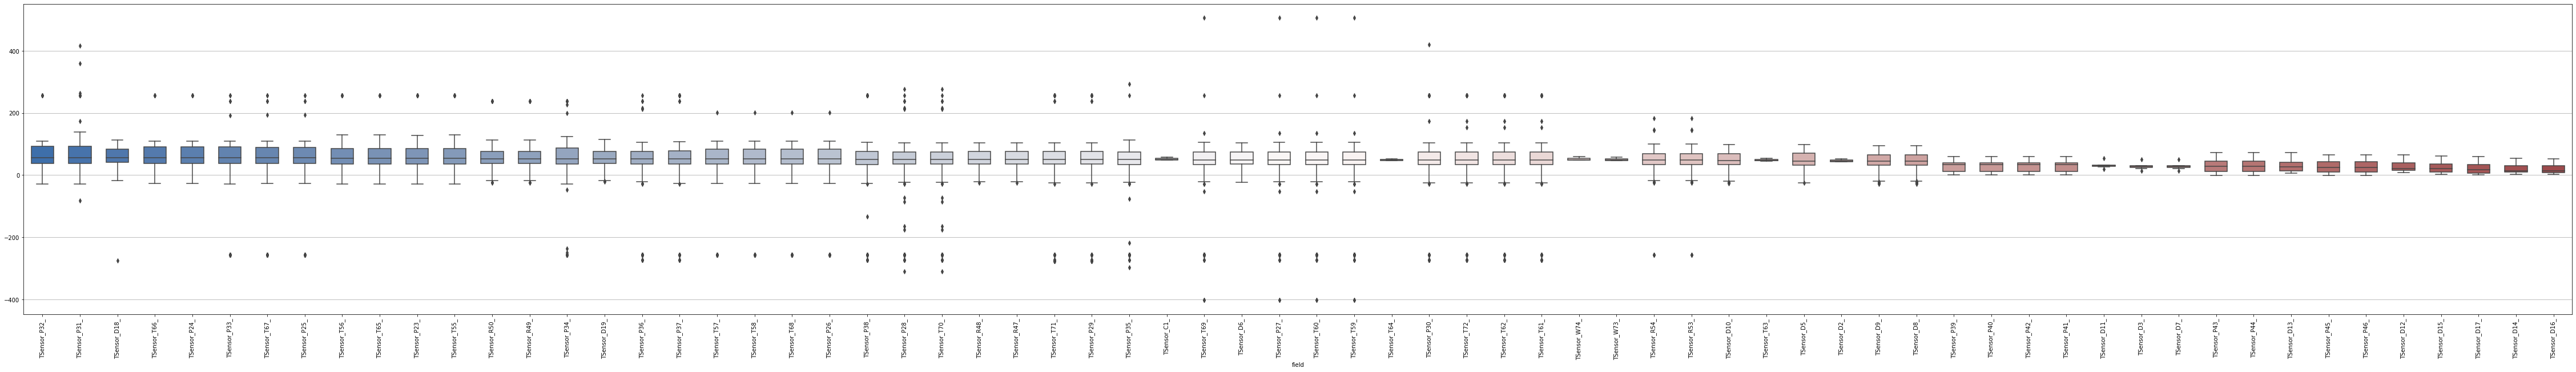

In [16]:
fig, ax = plt.subplots(figsize=(80,10)) 
ax.grid();
plt.xticks(rotation=90)
#abc_nod4.boxplot(rot=90)
g = sns.boxplot(width=.6, palette="vlag", data=abc_nod4.iloc[:,1:], ax=ax, order=sortedSensor)

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
iso = IsolationForest(contamination=0.005)

In [19]:
testoutlif = abc['TSensor_P24_'].dropna()

In [20]:
yhat = iso.fit_predict(testoutlif.values.reshape(-1, 1))
mask = yhat == -1

In [21]:
np.bincount(mask), len(mask)

(array([67102,   338], dtype=int64), 67440)

In [22]:
338/67440

0.005011862396204033

In [23]:
testoutlif[mask][:10]

2108    1.9
2109    0.3
2277    2.5
2337    2.6
2344   -3.3
2432   -6.3
2464    2.4
2756    1.0
2821   -6.8
2910   -0.8
Name: TSensor_P24_, dtype: float64

In [24]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()

In [25]:
dbscan.fit(testoutlif.values.reshape(-1, 1))

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [26]:
mask2 = dbscan.labels_ == -1

In [27]:
np.bincount(mask2), len(mask2)

(array([67421,    19], dtype=int64), 67440)

In [28]:
testoutlif[mask2]

4558     255.9
12278    -18.3
12281    -18.3
12450    -18.8
12451    -15.3
13811    255.9
15037    -17.1
15040    -23.9
15041    -25.8
15042    -16.3
15043    -21.3
15157    -15.8
15163    -15.9
22832    255.9
23965    109.5
33986    255.9
44928    109.3
49434    109.5
55322    -27.3
Name: TSensor_P24_, dtype: float64

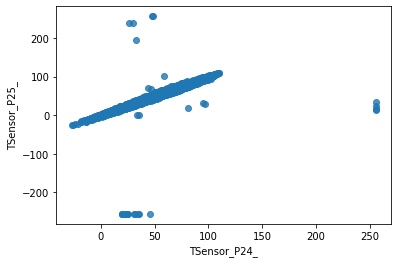

In [29]:
sns.regplot(data=abc, x="TSensor_P24_", y="TSensor_P25_", fit_reg=False)

In [30]:
sens24_25 = abc[["id_audit","TSensor_P24_","TSensor_P25_"]].dropna()

In [31]:
sens24_25.head()

field,id_audit,TSensor_P24_,TSensor_P25_
0,1000033,39.0,38.5
1,1000034,26.5,26.5
2,1000035,43.5,45.5
3,1000044,78.0,77.0
4,1000047,50.5,48.8


In [32]:
sens24_25.shape

(67440, 3)

In [33]:
dbscan = DBSCAN(eps=0.5)

In [34]:
dbscan.fit(sens24_25["TSensor_P24_"].values.reshape(-1, 1))

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [35]:
mask3 = dbscan.labels_ == -1

In [36]:
np.bincount(mask3), len(mask3)

(array([67421,    19], dtype=int64), 67440)

In [37]:
sens24_25[mask3]

field,id_audit,TSensor_P24_,TSensor_P25_
4558,1066623,255.9,22.6
12278,1181385,-18.3,-17.3
12281,1181388,-18.3,-16.3
12450,1183562,-18.8,-17.8
12451,1183563,-15.3,-13.3
13811,1208990,255.9,13.6
15037,1227359,-17.1,-15.5
15040,1227367,-23.9,-24.0
15041,1227380,-25.8,-24.3
15042,1227381,-16.3,-15.8


In [38]:
dbscan.fit(sens24_25["TSensor_P25_"].values.reshape(-1, 1))

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [39]:
mask4 = dbscan.labels_ == -1

In [40]:
np.bincount(mask4), len(mask4)

(array([67420,    20], dtype=int64), 67440)

In [41]:
sens24_25[mask4]

field,id_audit,TSensor_P24_,TSensor_P25_
8025,1116704,-13.8,-17.3
12170,1179955,-14.3,-16.8
12278,1181385,-18.3,-17.3
12281,1181388,-18.3,-16.3
12450,1183562,-18.8,-17.8
15037,1227359,-17.1,-15.5
15040,1227367,-23.9,-24.0
15041,1227380,-25.8,-24.3
15042,1227381,-16.3,-15.8
15043,1227395,-21.3,-23.3


In [42]:
sens24_25[mask3 | mask4]

field,id_audit,TSensor_P24_,TSensor_P25_
4558,1066623,255.9,22.6
8025,1116704,-13.8,-17.3
12170,1179955,-14.3,-16.8
12278,1181385,-18.3,-17.3
12281,1181388,-18.3,-16.3
12450,1183562,-18.8,-17.8
12451,1183563,-15.3,-13.3
13811,1208990,255.9,13.6
15037,1227359,-17.1,-15.5
15040,1227367,-23.9,-24.0


In [49]:
dbscan = DBSCAN(eps=1)
dbscan.fit(sens24_25[["TSensor_P24_","TSensor_P25_"]])

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [50]:
mask5 = dbscan.labels_ == -1
np.bincount(mask5), len(mask5)

(array([67318,   122], dtype=int64), 67440)

In [52]:
sens24_25[mask5].head()

field,id_audit,TSensor_P24_,TSensor_P25_
553,1006330,81.0,86.0
1385,1018802,79.6,84.4
1953,1025375,30.1,36.4
2502,1036541,70.0,60.8
2668,1039039,37.5,28.0


In [59]:
sens24_25["mask5"] = mask5
sens24_25["mask3"] = mask3
sens24_25["mask4"] = mask4
sens24_25["mask3_4"] = mask3 | mask4

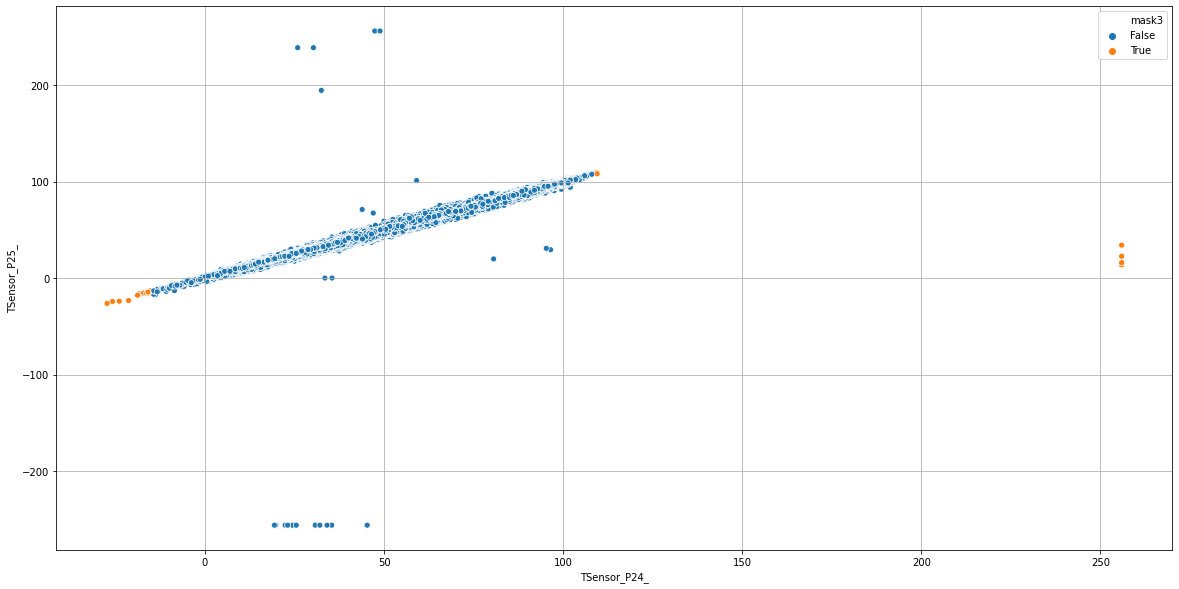

In [66]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = plt.axes(yscale='linear')
ax.grid();
sns.scatterplot(data = sens24_25, x = "TSensor_P24_", y = "TSensor_P25_", hue="mask3", ax=ax)

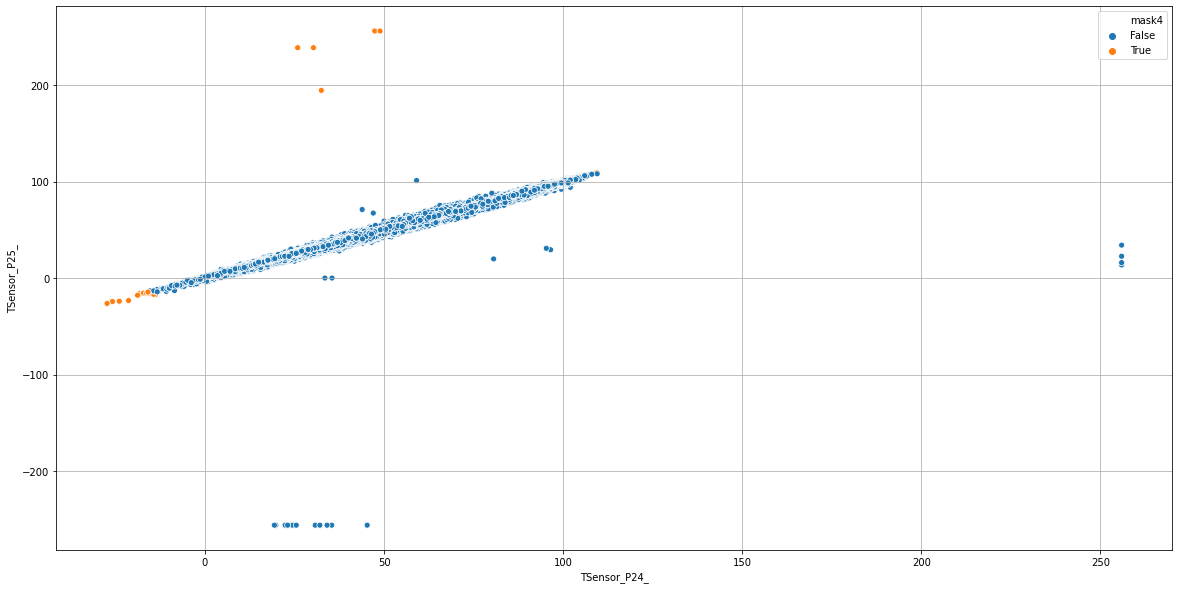

In [67]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = plt.axes(yscale='linear')
ax.grid();
sns.scatterplot(data = sens24_25, x = "TSensor_P24_", y = "TSensor_P25_", hue="mask4", ax=ax)

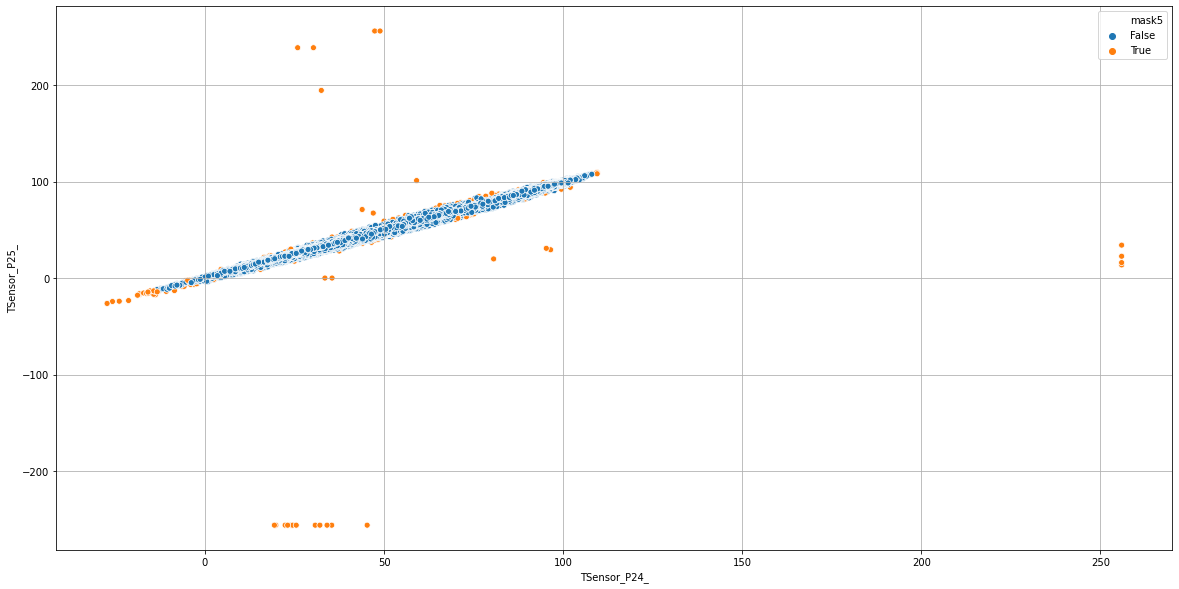

In [69]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = plt.axes(yscale='linear')
ax.grid();
sns.scatterplot(data = sens24_25, x = "TSensor_P24_", y = "TSensor_P25_", hue="mask5", ax=ax)

In [68]:
sens24_25[sens24_25.TSensor_P25_< -200]

field,id_audit,TSensor_P24_,TSensor_P25_,mask5,mask3,mask3_4,mask4
4348,1062866,19.5,-256.0,True,False,False,False
5585,1080966,19.8,-256.0,True,False,False,False
5911,1083346,22.4,-256.0,True,False,False,False
5926,1083499,24.1,-256.0,True,False,False,False
5928,1083505,19.4,-256.0,True,False,False,False
10977,1161499,24.5,-256.0,True,False,False,False
37923,1512976,30.8,-256.0,True,False,False,False
38889,1528852,45.3,-256.0,True,False,False,False
43463,1624494,35.4,-256.0,True,False,False,False
46214,1672565,34.1,-256.0,True,False,False,False


In [73]:
sens24_25_clean = sens24_25[~mask5]

In [74]:
sens24_25_clean.shape

(67318, 7)

In [75]:
from sklearn.linear_model import LinearRegression
lnclf = LinearRegression()

In [78]:
lnclf.fit(sens24_25_clean["TSensor_P24_"].values.reshape(-1, 1), sens24_25_clean["TSensor_P25_"].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
ypred = lnclf.predict(sens24_25[mask5]["TSensor_P24_"].values.reshape(-1, 1))

Text(0, 0.5, 'Residual')

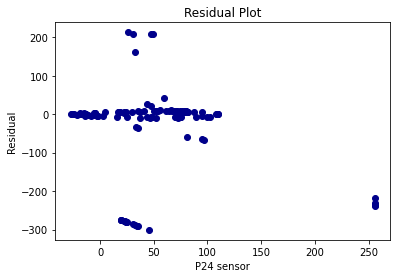

In [86]:
residuals = sens24_25[mask5]["TSensor_P25_"].values.reshape(-1, 1)-ypred
plt.plot(sens24_25[mask5]["TSensor_P24_"].values.reshape(-1, 1),residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("P24 sensor")
plt.ylabel("Residual")

In [87]:
resMask = abs(residuals) > 100

In [92]:
resMask.shape, residuals.shape, ypred.shape

((122, 1), (122, 1), (122, 1))

In [94]:
sens24_25['resMask'] = False
sens24_25[mask5]['resMask'] = resMask

C:\Users\eleozhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


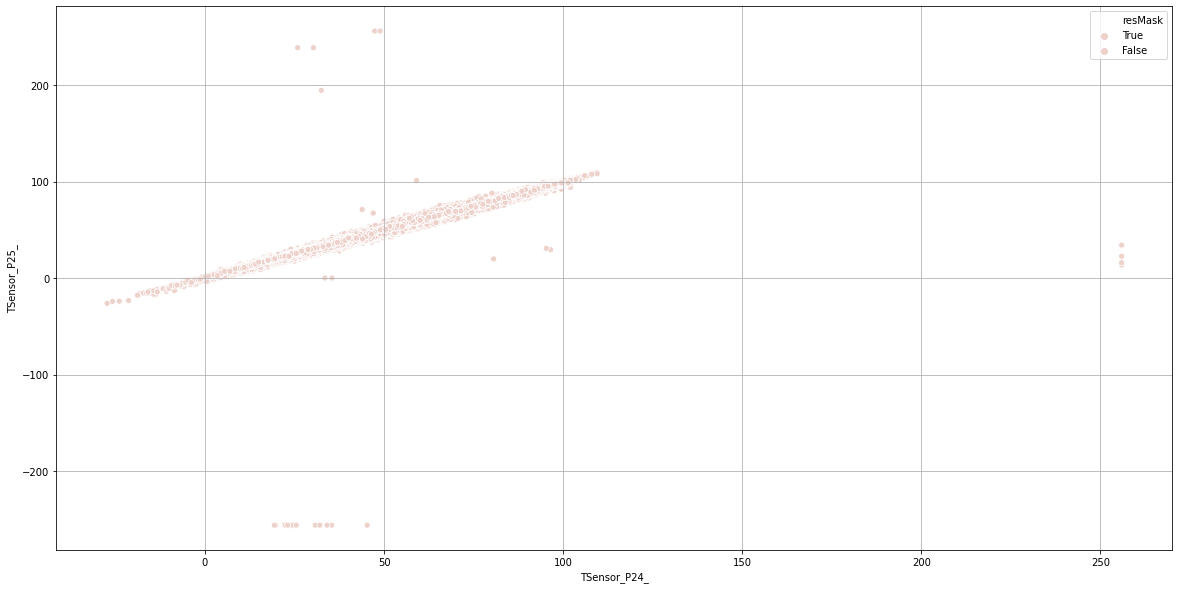

In [95]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = plt.axes(yscale='linear')
ax.grid();
sns.scatterplot(data = sens24_25, x = "TSensor_P24_", y = "TSensor_P25_", hue="resMask", ax=ax)

In [ ]:
ds1radiotemp.id_ftp.value_counts().sort_values(ascending=False).head()

In [ ]:
ds1radiotemp[(ds1radiotemp.field=='TSensor_P24_') & (ds1radiotemp.id_ftp == 569336 )]

In [ ]:
ds1radiotemp[ds1radiotemp.field=='TSensor_P24_']

In [ ]:
ds1radiotemp[(ds1radiotemp.field=='TSensor_P31_') & (ds1radiotemp.id_ftp == 569336 )]

In [ ]:
ds1radiotemp[ds1radiotemp.field=='TSensor_P31_']

In [96]:
ds2powerclass = pd.read_csv("../../dataset_2_powerClass_20210303.csv", sep=";", dtype={'id_audit':np.str})

In [97]:
ds2powerclass["powerClassValue"] = ds2powerclass['value'].str.split('[').str[0].str.split('W').str[0].str.strip().astype(int)

In [98]:
ds2powerclass.head()

,id_trx_status,id_audit,branch_header,field,value,powerClassValue
0,2917,21,Branch A,powerClass,20W [43.00 dBm],20
1,3008,21,Branch B,powerClass,20W [43.00 dBm],20
2,3099,21,Branch C,powerClass,20W [43.00 dBm],20
3,3190,21,Branch D,powerClass,20W [43.00 dBm],20
4,3286,21,Branch E,powerClass,40W [46.15 dBm],40


In [99]:
efg = ds2powerclass.pivot_table(index=["id_audit"],values=['powerClassValue'], aggfunc=[np.sum, np.mean, np.median, np.max, np.min, np.std, len])

In [100]:
efg = efg.droplevel(1, axis=1).reset_index()

In [101]:
efg.columns= ['id_audit', 'powerClassSum', 'powerClassMean', 'powerClassMedian','powerClassMax','powerClassMin','powerClassStd','powerClassCount']

In [102]:
efg.head()

,id_audit,powerClassSum,powerClassMean,powerClassMedian,powerClassMax,powerClassMin,powerClassStd,powerClassCount
0,1000018,400,50.0,50,60,40,10.690450,8
1,1000033,280,35.0,40,60,20,14.142136,8
2,1000034,340,42.5,50,60,20,19.820624,8
3,1000035,280,35.0,40,60,20,14.142136,8
4,1000047,400,50.0,50,60,40,10.690450,8


In [103]:
efg.powerClassCount[efg.powerClassCount!=8]

12801    4
12802    4
31813    4
39452    4
42392    4
Name: powerClassCount, dtype: int32

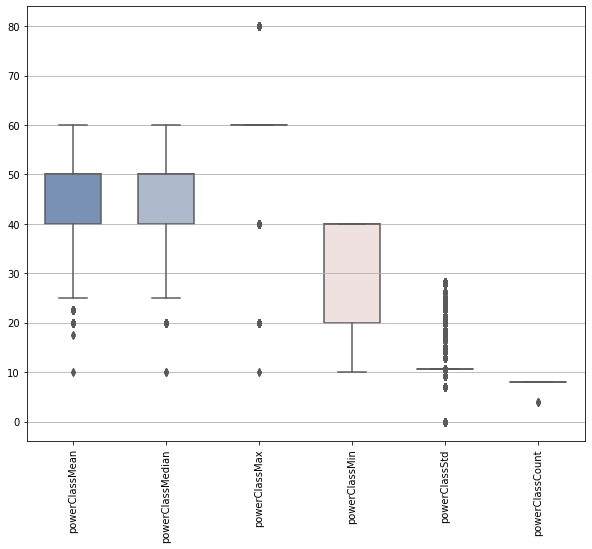

In [104]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax.grid();
plt.xticks(rotation=90)
#abc_nod4.boxplot(rot=90)
g = sns.boxplot(width=.6, palette="vlag", data=efg.iloc[:,2:], ax=ax)

In [105]:
abc.head()

field,id_audit,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_
0,1000033,NaN,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.5,28.3,NaN,NaN,28.0,27.8,32.8,NaN,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,32.3,28.6,28.6,23.0,23.0,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,NaN,NaN,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,NaN,NaN
1,1000034,NaN,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,37.0,NaN,NaN,27.3,27.3,29.8,NaN,29.8,29.5,25.5,26.5,26.5,24.5,34.0,35.5,36.5,33.0,24.0,25.5,25.0,23.5,33.5,35.5,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,29.9,27.5,27.5,30.1,30.1,32.0,32.0,25.5,25.5,24.0,24.0,34.0,34.0,33.0,33.0,NaN,NaN,25.5,26.5,26.5,24.0,34.0,35.0,36.5,33.0,NaN,NaN
2,1000035,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.3,30.7,NaN,NaN,32.5,32.8,32.8,NaN,25.8,25.8,36.5,43.5,45.5,42.0,23.5,24.5,25.0,25.0,42.5,45.5,46.5,43.0,23.5,23.5,24.0,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,32.1,34.6,34.6,25.9,25.9,27.6,27.6,37.0,37.0,42.0,42.0,24.0,24.0,25.0,25.0,NaN,NaN,37.0,43.5,45.5,42.0,24.0,24.0,25.0,25.0,NaN,NaN
3,1000044,NaN,57.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.9,62.3,NaN,NaN,62.8,62.3,67.5,NaN,57.0,56.8,74.0,78.0,77.0,71.5,64.5,63.5,58.0,54.0,79.0,79.0,77.0,73.0,65.0,66.0,60.5,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.6,67.6,65.1,65.1,58.0,58.0,56.3,56.3,74.0,74.0,72.0,72.0,64.5,64.5,54.0,54.0,NaN,NaN,74.0,78.0,77.0,72.0,64.5,63.0,58.0,54.0,NaN,NaN
4,1000047,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2,40.9,NaN,NaN,37.0,36.8,42.5,NaN,33.8,33.5,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,50.6,50.5,48.4,45.3,40.5,42.5,43.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,45.7,49.6,49.6,45.1,45.1,39.4,39.4,48.1,48.1,44.4,44.4,39.4,39.4,40.1,40.1,NaN,NaN,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,NaN,NaN


In [106]:
d12join = abc.merge(efg,sort=False)

In [107]:
d12join.head()

,id_audit,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_,powerClassSum,powerClassMean,powerClassMedian,powerClassMax,powerClassMin,powerClassStd,powerClassCount
0,1000033,NaN,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.5,28.3,NaN,NaN,28.0,27.8,32.8,NaN,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,32.3,28.6,28.6,23.0,23.0,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,NaN,NaN,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,NaN,NaN,280,35.0,40,60,20,14.142136,8
1,1000034,NaN,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,37.0,NaN,NaN,27.3,27.3,29.8,NaN,29.8,29.5,25.5,26.5,26.5,24.5,34.0,35.5,36.5,33.0,24.0,25.5,25.0,23.5,33.5,35.5,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,29.9,27.5,27.5,30.1,30.1,32.0,32.0,25.5,25.5,24.0,24.0,34.0,34.0,33.0,33.0,NaN,NaN,25.5,26.5,26.5,24.0,34.0,35.0,36.5,33.0,NaN,NaN,340,42.5,50,60,20,19.820624,8
2,1000035,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.3,30.7,NaN,NaN,32.5,32.8,32.8,NaN,25.8,25.8,36.5,43.5,45.5,42.0,23.5,24.5,25.0,25.0,42.5,45.5,46.5,43.0,23.5,23.5,24.0,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,32.1,34.6,34.6,25.9,25.9,27.6,27.6,37.0,37.0,42.0,42.0,24.0,24.0,25.0,25.0,NaN,NaN,37.0,43.5,45.5,42.0,24.0,24.0,25.0,25.0,NaN,NaN,280,35.0,40,60,20,14.142136,8
3,1000047,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2,40.9,NaN,NaN,37.0,36.8,42.5,NaN,33.8,33.5,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,50.6,50.5,48.4,45.3,40.5,42.5,43.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,45.7,49.6,49.6,45.1,45.1,39.4,39.4,48.1,48.1,44.4,44.4,39.4,39.4,40.1,40.1,NaN,NaN,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,NaN,NaN,400,50.0,50,60,40,10.690450,8
4,1000077,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.7,37.0,NaN,NaN,37.0,37.5,40.3,NaN,30.5,30.0,35.8,37.9,39.0,36.8,29.4,30.9,30.6,30.5,35.8,36.6,36.9,36.0,29.0,29.4,29.9,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,41.3,48.6,48.6,39.8,39.8,33.7,33.7,35.8,35.8,36.8,36.8,29.4,29.4,30.5,30.5,NaN,NaN,35.8,37.9,39.0,36.8,29.4,30.9,30.6,30.5,NaN,NaN,160,20.0,20,20,20,0.000000,8


In [108]:
heatcheckcols = d12join.columns[1:]
aaa = list(heatcheckcols[:-7])
aaa.extend(list(heatcheckcols[[-6]]))

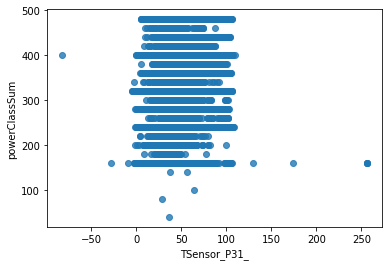

In [109]:
sns.regplot(data=d12join, x="TSensor_P31_", y="powerClassSum", fit_reg=False)

In [110]:
d12join[aaa].head()

,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_,powerClassMean
0,NaN,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.5,28.3,NaN,NaN,28.0,27.8,32.8,NaN,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,32.3,28.6,28.6,23.0,23.0,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,NaN,NaN,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,NaN,NaN,35.0
1,NaN,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,37.0,NaN,NaN,27.3,27.3,29.8,NaN,29.8,29.5,25.5,26.5,26.5,24.5,34.0,35.5,36.5,33.0,24.0,25.5,25.0,23.5,33.5,35.5,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,29.9,27.5,27.5,30.1,30.1,32.0,32.0,25.5,25.5,24.0,24.0,34.0,34.0,33.0,33.0,NaN,NaN,25.5,26.5,26.5,24.0,34.0,35.0,36.5,33.0,NaN,NaN,42.5
2,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.3,30.7,NaN,NaN,32.5,32.8,32.8,NaN,25.8,25.8,36.5,43.5,45.5,42.0,23.5,24.5,25.0,25.0,42.5,45.5,46.5,43.0,23.5,23.5,24.0,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,32.1,34.6,34.6,25.9,25.9,27.6,27.6,37.0,37.0,42.0,42.0,24.0,24.0,25.0,25.0,NaN,NaN,37.0,43.5,45.5,42.0,24.0,24.0,25.0,25.0,NaN,NaN,35.0
3,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2,40.9,NaN,NaN,37.0,36.8,42.5,NaN,33.8,33.5,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,50.6,50.5,48.4,45.3,40.5,42.5,43.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,45.7,49.6,49.6,45.1,45.1,39.4,39.4,48.1,48.1,44.4,44.4,39.4,39.4,40.1,40.1,NaN,NaN,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,NaN,NaN,50.0
4,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.7,37.0,NaN,NaN,37.0,37.5,40.3,NaN,30.5,30.0,35.8,37.9,39.0,36.8,29.4,30.9,30.6,30.5,35.8,36.6,36.9,36.0,29.0,29.4,29.9,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,41.3,48.6,48.6,39.8,39.8,33.7,33.7,35.8,35.8,36.8,36.8,29.4,29.4,30.5,30.5,NaN,NaN,35.8,37.9,39.0,36.8,29.4,30.9,30.6,30.5,NaN,NaN,20.0


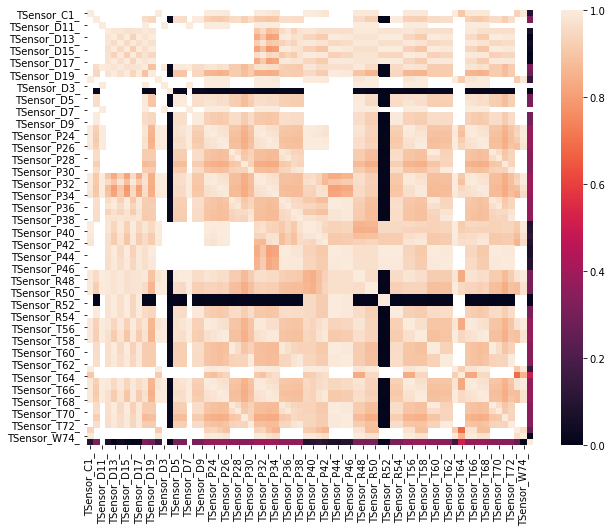

In [111]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(abs(d12join[aaa].corr()), ax=ax)

In [112]:
d12join.corr()['powerClassSum'].head()

TSensor_C1_     0.095783
TSensor_D10_    0.312886
TSensor_D11_         NaN
TSensor_D12_   -0.073737
TSensor_D13_    0.004022
Name: powerClassSum, dtype: float64

In [113]:
ds3radioid = pd.read_csv("../../dataset_3_radioId_20210303.csv",sep=";", dtype={'id_audit':np.str})

In [114]:
ds3radioid.head()

,id_audit,customer,serial
0,21,2,15551
1,23,2,15403
2,25,2,16084
3,147,2,17087
4,746,2,15486


In [115]:
audser = ds3radioid[['serial','customer']].groupby('serial').count()

In [116]:
audser.customer[audser.customer > 1].sort_values(ascending=False).head()

serial
16335    240
16486    230
15757    209
16374    172
17494    169
Name: customer, dtype: int64

In [117]:
audser.customer[audser.customer > 1].sort_values(ascending=False).describe()

count    12209.000000
mean         4.860021
std          8.567115
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        240.000000
Name: customer, dtype: float64

In [118]:
d123join = d12join.merge(ds3radioid,sort=False)

In [119]:
s16335 = d123join[d123join.serial==16335]

In [120]:
s16335.head()

,id_audit,TSensor_C1_,TSensor_D10_,TSensor_D11_,TSensor_D12_,TSensor_D13_,TSensor_D14_,TSensor_D15_,TSensor_D16_,TSensor_D17_,TSensor_D18_,TSensor_D19_,TSensor_D2_,TSensor_D3_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D7_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_P39_,TSensor_P40_,TSensor_P41_,TSensor_P42_,TSensor_P43_,TSensor_P44_,TSensor_P45_,TSensor_P46_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T63_,TSensor_T64_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,TSensor_W73_,TSensor_W74_,powerClassSum,powerClassMean,powerClassMedian,powerClassMax,powerClassMin,powerClassStd,powerClassCount,customer,serial
61,1001255,NaN,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.5,63.3,NaN,NaN,73.5,74.0,79.5,NaN,57.3,56.8,84.5,91.0,91.0,84.5,64.0,65.0,63.5,63.5,90.5,92.5,91.5,86.0,65.5,66.5,65.5,64.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5,80.5,77.3,77.3,70.3,70.3,60.1,60.1,85.0,85.0,84.5,84.5,64.0,64.0,63.5,63.5,NaN,NaN,85.0,91.0,91.0,84.5,64.0,65.0,64.0,62.5,NaN,NaN,400,50.0,50,60,40,10.69045,8,2,16335
168,1003141,NaN,58.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.4,64.2,NaN,NaN,74.3,75.5,80.5,NaN,57.8,58.5,85.5,92.0,91.5,85.0,65.5,65.0,64.5,63.5,90.0,92.5,92.0,86.0,66.0,67.5,66.0,65.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.5,81.5,78.1,78.1,71.3,71.3,61.0,61.0,85.5,85.5,85.0,85.0,65.5,65.5,63.5,63.5,NaN,NaN,85.5,91.5,91.5,85.0,65.5,65.0,64.5,63.5,NaN,NaN,400,50.0,50,60,40,10.69045,8,2,16335
1730,1026442,NaN,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,62.8,NaN,NaN,71.8,72.8,78.0,NaN,57.5,57.0,81.5,87.0,88.0,81.0,63.5,64.0,63.5,62.5,87.0,87.5,87.0,82.0,64.5,66.5,64.5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.5,78.5,75.4,75.4,70.0,70.0,59.8,59.8,81.5,81.5,81.0,81.0,63.5,63.5,62.5,62.5,NaN,NaN,81.5,87.0,87.0,81.0,63.0,63.5,63.5,62.5,NaN,NaN,400,50.0,50,60,40,10.69045,8,2,16335
3982,1301689,NaN,80.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.3,87.6,NaN,NaN,82.5,82.5,87.0,NaN,77.3,77.5,94.0,98.0,97.5,93.5,84.5,87.0,87.5,86.0,99.0,100.0,99.0,95.5,86.0,89.0,89.5,88.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.5,87.5,85.3,85.3,91.7,91.7,83.0,83.0,93.5,93.5,93.5,93.5,84.5,84.5,86.0,86.0,NaN,NaN,93.5,98.0,97.5,93.5,84.5,87.0,87.5,86.0,NaN,NaN,400,50.0,50,60,40,10.69045,8,2,16335
4002,1302443,NaN,79.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.8,86.6,NaN,NaN,81.0,81.3,85.3,NaN,76.0,75.8,93.0,97.0,97.0,92.5,84.0,87.0,87.0,85.5,98.5,99.5,98.0,93.5,85.0,88.5,88.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.1,86.1,83.8,83.8,90.6,90.6,81.8,81.8,93.0,93.0,92.5,92.5,84.0,84.0,85.5,85.5,NaN,NaN,93.0,97.0,96.5,92.5,84.5,86.0,87.0,85.5,NaN,NaN,400,50.0,50,60,40,10.69045,8,2,16335


In [121]:
s16335Plot = s16335.iloc[:,1:-9]

In [122]:
meds1 = s16335Plot.median()
meds1.sort_values(ascending=False, inplace=True)
sortedSensor1 = meds1.index

C:\Users\eleozhu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


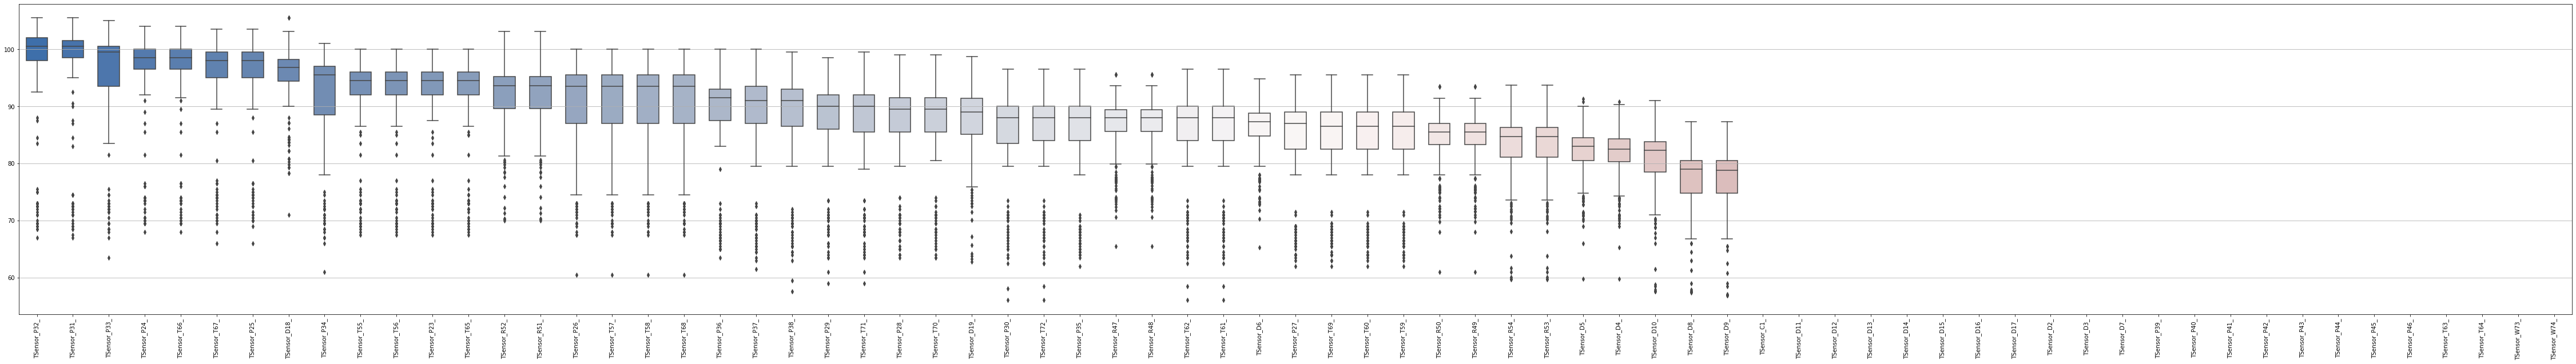

In [123]:
fig, ax = plt.subplots(figsize=(80,10)) 
ax.grid();
plt.xticks(rotation=90)
#abc_nod4.boxplot(rot=90)
g = sns.boxplot(width=.6, palette="vlag", data=s16335.iloc[:,1:], ax=ax, order=sortedSensor1)

In [124]:
s16335.corr()['powerClassSum']

TSensor_C1_              NaN
TSensor_D10_        0.533184
TSensor_D11_             NaN
TSensor_D12_             NaN
TSensor_D13_             NaN
TSensor_D14_             NaN
TSensor_D15_             NaN
TSensor_D16_             NaN
TSensor_D17_             NaN
TSensor_D18_        0.756309
TSensor_D19_        0.597728
TSensor_D2_              NaN
TSensor_D3_              NaN
TSensor_D4_         0.635349
TSensor_D5_         0.634960
TSensor_D6_         0.709603
TSensor_D7_              NaN
TSensor_D8_         0.530259
TSensor_D9_         0.535674
TSensor_P23_        0.895609
TSensor_P24_        0.914888
TSensor_P25_        0.902516
TSensor_P26_        0.839540
TSensor_P27_        0.775230
TSensor_P28_        0.759354
TSensor_P29_        0.753811
TSensor_P30_        0.730045
TSensor_P31_        0.925987
TSensor_P32_        0.922984
TSensor_P33_        0.896169
TSensor_P34_        0.854662
TSensor_P35_        0.790629
TSensor_P36_        0.802572
TSensor_P37_        0.783414
TSensor_P38_  

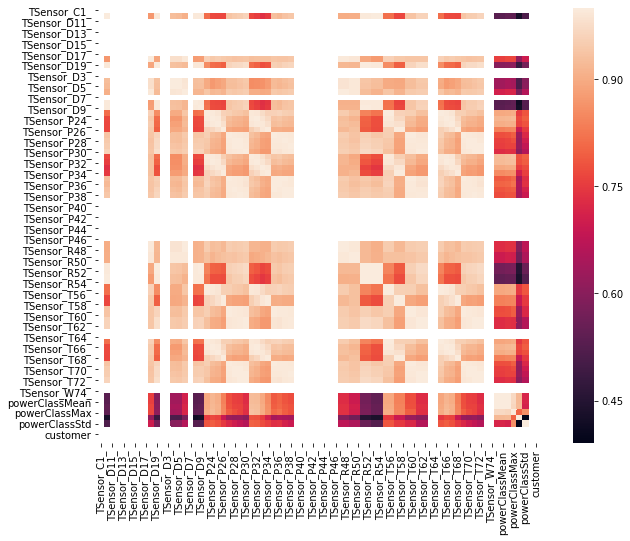

In [125]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(abs(s16335.corr()), ax=ax)

### Check if exists any empty records in radio Temp dataset
* Here we found 641 records without temperatures, among total 3238259
* Sounds mostly due to "Error: Command unsupported"
* TSensor_N22_ is not working at all. Total: 638, Breakdown: 638 
* At this stage, we just remove those records

In [ ]:
ds1radiotemp.info(verbose=True,null_counts=True)

In [ ]:
ds1radiotemp.isnull().sum()

In [ ]:
ds1radiotemp[ds1radiotemp.value.isnull()].groupby('unit').count()

In [ ]:
ds1radiotemp[ds1radiotemp.value.isnull()].groupby('field').count()

In [ ]:
ds1radiotemp[ds1radiotemp.field=='TSensor_N22_']['field'].count()

In [ ]:
ds1radiotemp.dropna(inplace=True)

In [ ]:
ds1radiotemp.info(verbose=True,null_counts=True)

### Check if exists any empty records in powerclass dataset
* no missing data

In [ ]:
ds2powerclass.info(verbose=True,null_counts=True)

### Check if exists any empty records in radioId dataset
* no missing data

In [ ]:
ds3radioid.info(verbose=True,null_counts=True)

### Find out basic data structure
* Total Audit, 67455
    * **each audit contains 48 records** 
    * But data is not full clean. 67455 * 48 = 3237840 (a slight bigger than cleaned data 3237618), less than 3238259 
    * Indicates some audit does not contains 48 records, maybe because of less branches, or because of less sensors
* Total Sensor 71
* Total Serial 27781 
    * *Not sure how Serial is associated to the type of Sensor.* 
    * *Not sure if all sensors of the same type is the same hardware/firmware or different serials incidates different hardware/firmware*
    * *It sounds* **one audit connects one Serials** but ppt said several audit could share the same serials.
    * This field sounds not useable, since it cannot connect to set of sensor clearly, even this might tell the firmware version, and impact temperature
* Total Branch 8
    * *It sounds* **each audit contains 8 branches, therefore, 6 sensors per branch**
* Total PowerClass 366812
    * **each branch contains a powerclass setup** This indicates 6 sensors share the same powerclass setup
    * **Not all audit has powerclass setup** 45854 < 67455 This indicates data is not clean. might remove those dirty audits or use some "default" value
    * **not all branches have powerclass setup (E,F,G,H braches)** This could be because no sensor is installed for E/F/G/H, or not have powerclass setup value. Need further check
    * *Not sure how to link powerclass to a particular set of sensors, among 48 sensors per audit* 
    * We might have to restore powwerclass-sensor relationship from data
* Total 2 customers
    * *Not sure different customers could have different usage/setup, so that temperatures will be highly different* This can be found out by joining the ds1 and ds3.

In [ ]:
ds1radiotemp['id_audit'].nunique()

In [ ]:
67455 * 48

In [ ]:
ds1radiotemp['field'].nunique()

In [ ]:
ds3radioid.serial.nunique()

In [ ]:
readingPerAuditDf = ds1radiotemp[['id_audit','value']].groupby('id_audit').count().reset_index().sort_values('value')

In [ ]:
readingPerAuditDf.describe()

In [ ]:
readingPerAuditDf.groupby('value').count()

In [ ]:
readingPerAuditDf[readingPerAuditDf.value==24]

In [ ]:
ds2powerclass[ds2powerclass.id_audit=='898299']

In [ ]:
ds2powerclass['branch_header'].value_counts()

In [ ]:
ds2powerclass['id_audit'].nunique()

In [ ]:
ds3radioid['id_audit'].nunique()

In [ ]:
ds3radioid.customer.nunique()

### Check temperature distribution
* Some sensors report negative values, this sounds not reasonable. But this might indicate weather temperature could impact record .For example, maybe sensor operates outside, in cold weather. 
* However, we dont have weather temperature. (*same physical location shall have similar weather temperature. If we can get location information from data, it will be good feature for modelling*)
* From quantile, most negative gathers between -1.8 and -9.1, further negative -20 sounds abnormal.
* Data is postive skew. Some extreme postive value exists
* For postive temperatures, quite large range exists, maybe because different type of hardware, sensor, powerclass. need more study

In [ ]:
ds1radiotemp.describe()

In [ ]:
Q1 = ds1radiotemp['value'].quantile(0.25)
Q3 = ds1radiotemp['value'].quantile(0.75)
IQR = Q3 - Q1
Q1out = Q1 - 1.5 * IQR
Q3out = Q3 + 1.5 * IQR
print("25% Quantile: ", Q1, "##75% Quantile: ", Q3, "##IQR: ", IQR, "##Q1 outlier: ", Q1out, "##Q3 outlier:", Q3out)

In [ ]:
ds1radiotemp['value'].skew()

In [ ]:
ds1radiotemp_neg = ds1radiotemp[ds1radiotemp['value'] < 0]

In [ ]:
ds1radiotemp_neg.describe()

In [ ]:
Q1 = ds1radiotemp_neg['value'].quantile(0.25)
Q3 = ds1radiotemp_neg['value'].quantile(0.75)
IQR = Q3 - Q1
Q1out = Q1 - 1.5 * IQR
print("25% Quantile: ", Q1, "##75% Quantile: ", Q3, "##IQR: ", IQR, "##Q1 outlier: ", Q1out)

In [ ]:
#mybins = pd.qcut(ds1radiotemp['value'], q=4, labels = ['lower','low','high','higher'])
cut_bins = [float("-inf"), -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,float("inf")]
mybins = pd.cut(ds1radiotemp['value'], bins=cut_bins)

In [ ]:
mybins.value_counts().sort_index()

In [ ]:
ds1radiotemp['bin'] = mybins

In [ ]:
fig, ax = plt.subplots(figsize=(12,8)) 
df2 = ds1radiotemp.groupby('bin').count()
df2['value'].plot(kind='bar', ax=ax)

### Check temperature distribution per audit
* Sounds different audit has large different range. Need found out the reason


In [ ]:
ds1radiotemp.id_audit.unique()

In [ ]:
ds1radiotemp[(ds1radiotemp.id_audit == '147') | (ds1radiotemp.id_audit == '746')
             | (ds1radiotemp.id_audit == '599167')
             | (ds1radiotemp.id_audit == '1970427')
             | (ds1radiotemp.id_audit == '1970491')
             | (ds1radiotemp.id_audit == '1970516')].boxplot(column='value', by='id_audit')

### Check temperature distribution per sensor
* **It indicates 2 differnt temperature segments.** 
* This might explain S1/S2 connets to power amplifier, S3-S9 connects to ohter HW on the radio
* Need find out which sensors are S1/S2, which are S3-S9, or just clustering into 2 groups sounds OK
* When clustering, a little bit concern about outliers might influence, so that sensores are classified into different group.

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
my_orderData = ds1radiotemp.groupby(by=["field"])["value"].median().sort_values(ascending=False)
my_orderData

In [ ]:
ds1radiotemp[['field','value']].groupby('field').median().sort_values(ascending=False, by='value').hist()

In [ ]:
my_order = my_orderData.index

In [ ]:
fig, ax = plt.subplots(figsize=(80,8)) 
ax.set(ylim=(-10, 200))
sns.boxplot(x='field', y='value', data=ds1radiotemp, ax=ax, order=my_order)

In [ ]:
ds1radiotemp.head()

In [ ]:
sortedSensor = ds1radiotemp['field'].value_counts().index

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10,60)) 
ax = plt.axes(xscale='log', yscale='log')
ax.grid();
g=sns.boxplot(x='value', y='field', width=.6, palette="vlag", data=ds1radiotemp, order=sortedSensor)
#sns.stripplot(x="value", y="field", data=ds1radiotemp,
#              size=4, color=".3", linewidth=0)
#g.set_xscale("log")
plt.title("Sensor Record distribution")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(80,8)) 
g= sns.countplot(x='field',data=ds1radiotemp, ax=ax, order = ds1radiotemp['field'].value_counts().index)
g.set_yscale("log")
plt.title("Sensor Record Counts")
plt.show()

In [ ]:
sensorCountdf = ds1radiotemp[['field', 'value']].groupby('field').count().reset_index().sort_values(['value'], ascending=False)

In [ ]:
sensorCountdf['logcount'] = np.log10(sensorCountdf.value)

In [ ]:
fig, ax = plt.subplots(figsize=(80,8)) 
sns.barplot(y='logcount',x='field',data=sensorCountdf, ax=ax)

### Check temperature distribution per customer
* 2 customers similar distribution, although the 2nd customer more variance

In [ ]:
ds13join = ds1radiotemp.merge(ds3radioid,sort=False)

In [ ]:
ds13join.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8)) 
ax.set(ylim=(-10, 200))
sns.boxplot(x='customer', y='value', data=ds13join, ax=ax)